<a href="https://colab.research.google.com/github/rmorlowski/Machine-Learning/blob/master/orlowski_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python analysis of MSPA Software Survey

MSDS422 SEC55
Ryan Orlowski

This assignment focuses on bringing data into Python, exploring and visualizing data. 

**Management Questions:**

Imagine that you are an academic administrator responsible for defining the future direction of the graduate program. The MSPA Survey has been designed with these objectives in mind:

Learn about current student software preferences

*   Learn about current student software preferences
*   Learn about student interest in potential new courses
*   Guide software and systems planning for current and future courses
*   Guide data science curriculum planning

#### Section 1: Data Survey

An initial data survey will provide an idea for the type of data we are analyzing.  The first step, is taking a look at the data to get a record count, identify missing values, and potential new variables.

This section shows how to read in data from a comma-delimited text file manipuate data, create new count variables, define categorical variables



In [0]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map 
import pandas_profiling # pandas profiling report for EDA
from matplotlib.ticker import FuncFormatter
from scipy.stats import kurtosis, skew # scipy stats for skew
import statsmodels.api as sm


In [0]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [0]:
# Import file to google colaboratory
from google.colab import files
uploaded = files.upload()

Saving mspa-survey-data.csv to mspa-survey-data (5).csv


In [0]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
# valid_survey_input = pd.read_csv('mspa-survey-data.csv')
import io

valid_survey_input = pd.read_csv(io.StringIO(uploaded['mspa-survey-data.csv'].decode('utf-8')))

In [0]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [0]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')


Contents of initial survey data ---------------


In [0]:
# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 


Number of Respondents = 207


In [0]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [0]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [0]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [0]:
#Do we have missing values? 
datasetHasNan = False
if valid_survey_input.count().min() == valid_survey_input.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan')

oops we have nan


In [0]:
#Check for missing data & list them 
if datasetHasNan == True:
    nas = pd.concat([valid_survey_input.isnull().sum()], axis=1, keys=['valid_survey_input Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
                                  valid_survey_input Dataset
Python_Course_Interest                                     1
Foundations_DE_Course_Interest                             7
Analytics_App_Course_Interest                              4
Systems_Analysis_Course_Interest                           7
Courses_Completed                                         20
PREDICT400                                                44
PREDICT401                                                36
PREDICT410                                                62
PREDICT411                                                94
PREDICT413                                               148
PREDICT420                                                80
PREDICT422                                               159
PREDICT450                                               190
PREDICT451                                               200
PREDICT452                                               194
PRE

In [0]:
#consider fixing records with missing NaN data or creating new columns
print (valid_survey_input.shape)
valid_survey_input.isnull().sum()
valid_survey_input[valid_survey_input == 0].count()

(207, 40)


Personal_JavaScalaSpark              79
Personal_JavaScriptHTMLCSS          117
Personal_Python                      11
Personal_R                            1
Personal_SAS                         44
Professional_JavaScalaSpark         100
Professional_JavaScriptHTMLCSS      121
Professional_Python                  22
Professional_R                       12
Professional_SAS                     60
Industry_JavaScalaSpark              85
Industry_JavaScriptHTMLCSS          110
Industry_Python                      20
Industry_R                           11
Industry_SAS                         56
Python_Course_Interest                6
Foundations_DE_Course_Interest       12
Analytics_App_Course_Interest        13
Systems_Analysis_Course_Interest     12
Courses_Completed                     0
PREDICT400                            0
PREDICT401                            0
PREDICT410                            0
PREDICT411                            0
PREDICT413                            0


In [0]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

#### Section 2: Exploratory Data Analysis (EDA)

Through extensive EDA, we may find variables that exhibit skew or kurtosis, new variables, or intercorrelations in the survey data.  Data visualizations may help uncover trends or distributions in the data that tell a story.

In [0]:
# Check the skewness and kurtosis of each variable
# Is skew close to zero 0?  Is kurtosis close to three 0.0?
print('My_Java Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.My_Java.skew(), software_df.My_Java.kurtosis()))
print('My_JS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.My_JS.skew(), software_df.My_JS.kurtosis()))
print('My_Python Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.My_Python.skew(), software_df.My_Python.kurtosis()))
print('My_R Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.My_R.skew(), software_df.My_R.kurtosis()))
print('My_SAS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.My_SAS.skew(), software_df.My_SAS.kurtosis()))
print('Prof_Java Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Prof_Java.skew(), software_df.Prof_Java.kurtosis()))
print('Prof_JS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Prof_JS.skew(), software_df.Prof_JS.kurtosis()))
print('Prof_Python Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Prof_Python.skew(), software_df.Prof_Python.kurtosis()))
print('Prof_R Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Prof_R.skew(), software_df.Prof_R.kurtosis()))
print('Prof_SAS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Prof_SAS.skew(), software_df.Prof_SAS.kurtosis()))
print('Ind_Java Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Ind_Java.skew(), software_df.Ind_Java.kurtosis()))
print('Ind_JS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Ind_JS.skew(), software_df.Ind_JS.kurtosis()))
print('Ind_Python Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Ind_Python.skew(), software_df.Ind_Python.kurtosis()))
print('Ind_R Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Ind_R.skew(), software_df.Ind_R.kurtosis()))
print('Ind_SAS Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    software_df.Ind_SAS.skew(), software_df.Ind_SAS.kurtosis()))

My_Java Skew: 1.414 | Kurtosis: 3.212
My_JS Skew: 1.371 | Kurtosis: 1.146
My_Python Skew: 0.645 | Kurtosis: 1.831
My_R Skew: 0.890 | Kurtosis: 1.849
My_SAS Skew: 0.857 | Kurtosis: 1.081
Prof_Java Skew: 2.134 | Kurtosis: 6.193
Prof_JS Skew: 4.238 | Kurtosis: 29.216
Prof_Python Skew: 0.618 | Kurtosis: 0.960
Prof_R Skew: 0.813 | Kurtosis: 1.220
Prof_SAS Skew: 1.393 | Kurtosis: 2.945
Ind_Java Skew: 1.413 | Kurtosis: 1.724
Ind_JS Skew: 1.754 | Kurtosis: 3.582
Ind_Python Skew: 0.596 | Kurtosis: 0.991
Ind_R Skew: 0.338 | Kurtosis: 0.709
Ind_SAS Skew: 1.322 | Kurtosis: 2.047


It appears there are a number of variables exhibiting skew and kurtosis that may benefit from transformations.

In [0]:
# Look for the highly skewed features.
numerical = software_df.dtypes[software_df.dtypes != 'object'].index

skewness = software_df[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

,Skewness
Prof_JS,4.206847
Prof_Java,2.118646
Ind_JS,1.741528
My_Java,1.403938
Ind_Java,1.402348
Prof_SAS,1.383093
My_JS,1.360901
Ind_SAS,1.312691
My_R,0.883166
My_SAS,0.850534


Text(0.5,1,'Distribution of Prof_JS')

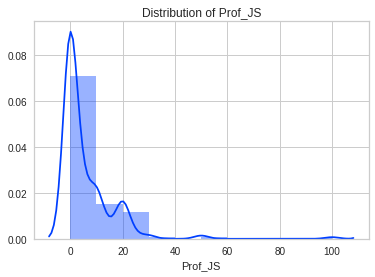

In [0]:
#Distribution Plot (Histogram of Prof_JS)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))
sns.distplot(software_df.Prof_JS, bins=10).set_title('Distribution of Prof_JS')
# Histogram confirms highly skewed distribution.

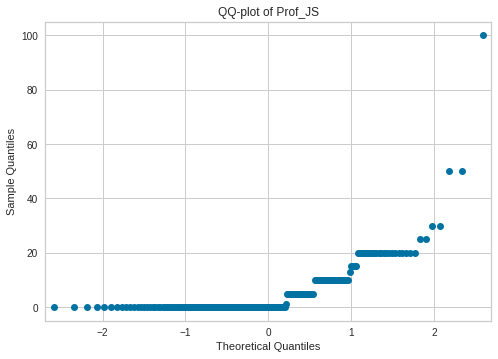

In [0]:
# create qqplot of age - confirms skewing in the tails
sm.qqplot(software_df['Prof_JS'])
plt.title('QQ-plot of Prof_JS') 
plt.show()
# QQ-plot confirms this variable is not normally distributed.

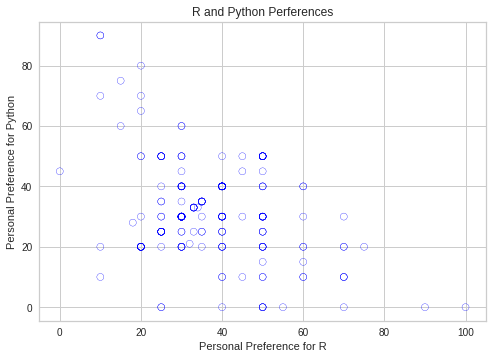

In [0]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]

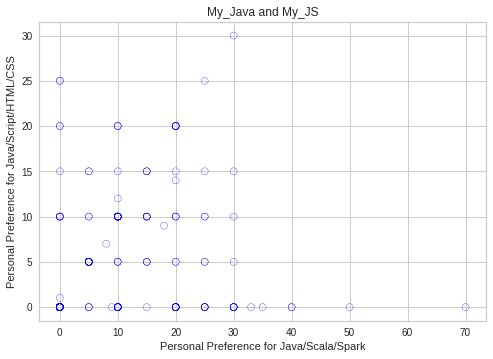

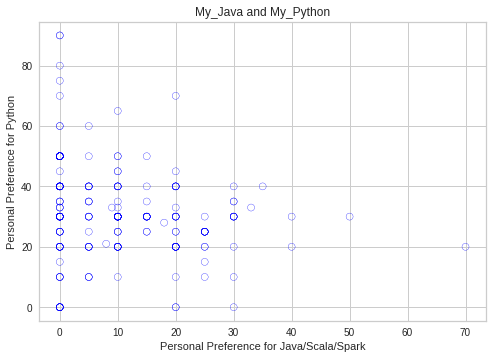

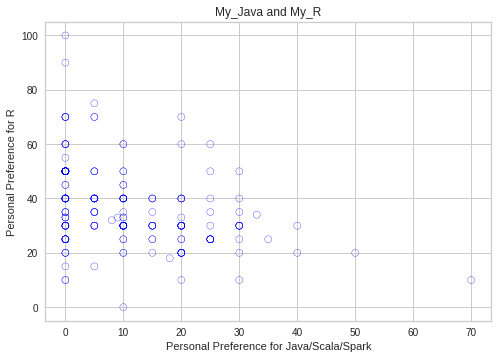

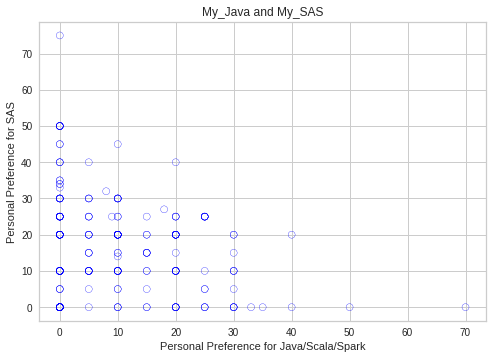

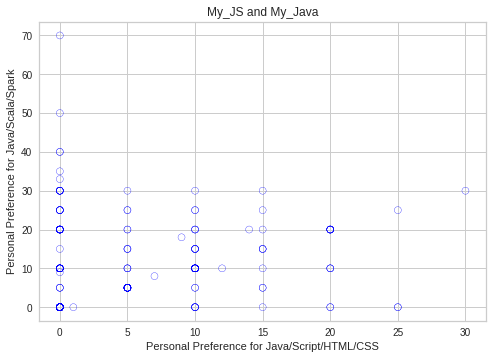

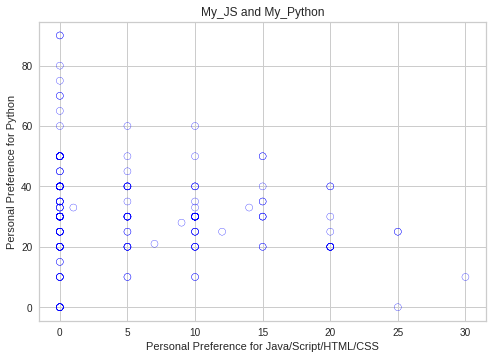

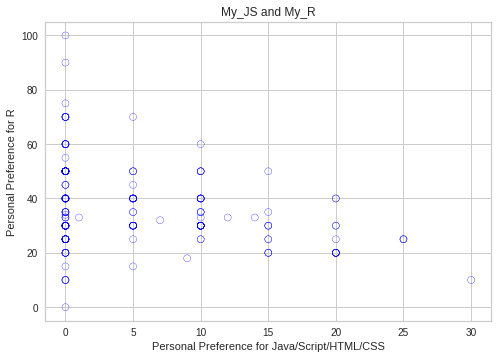

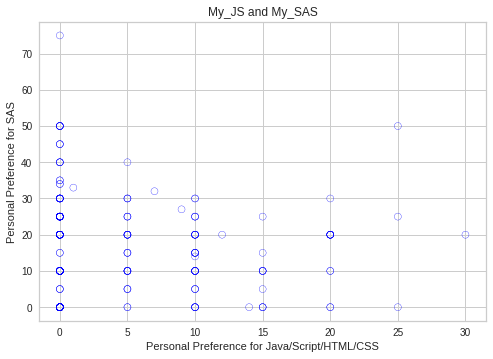

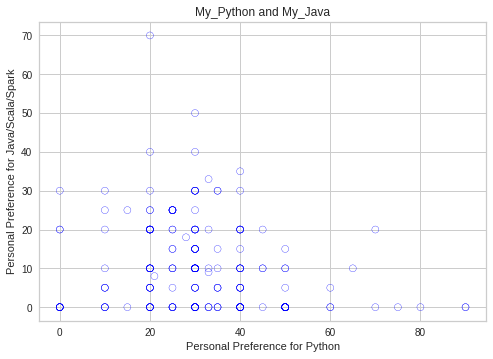

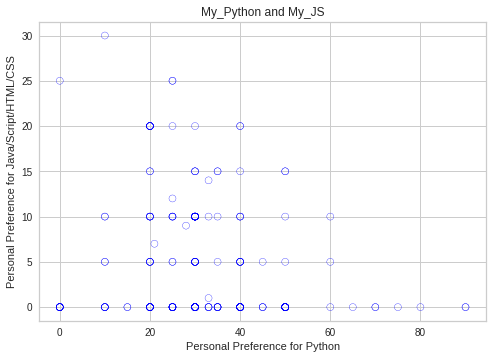

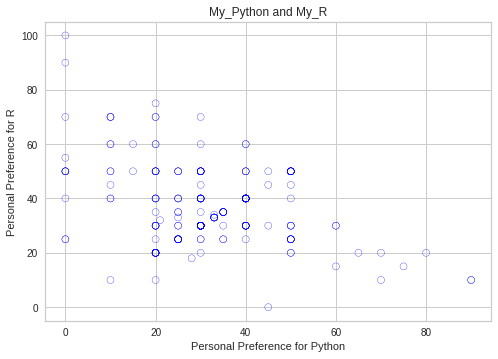

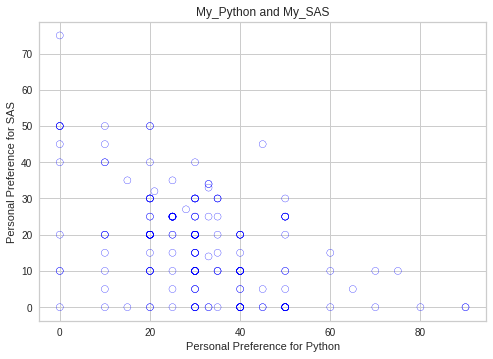

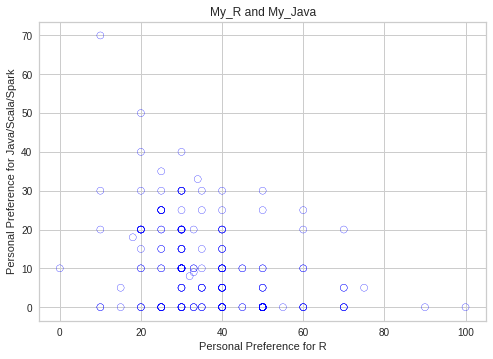

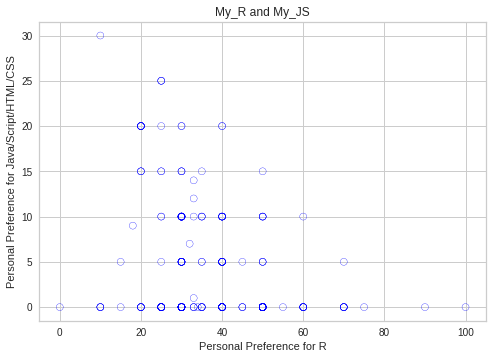

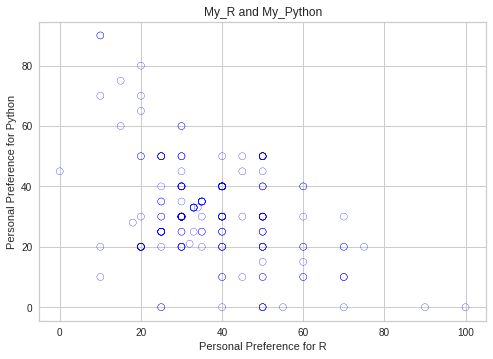

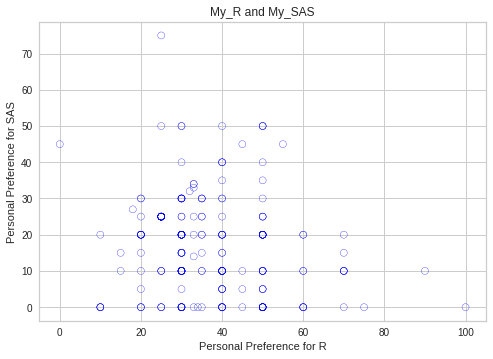

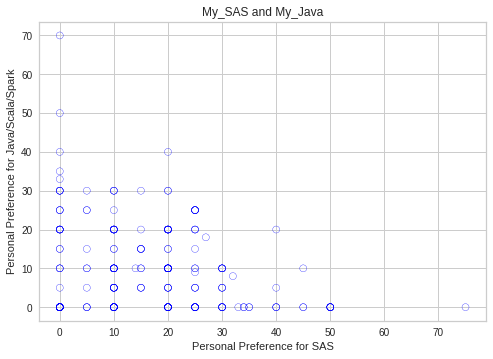

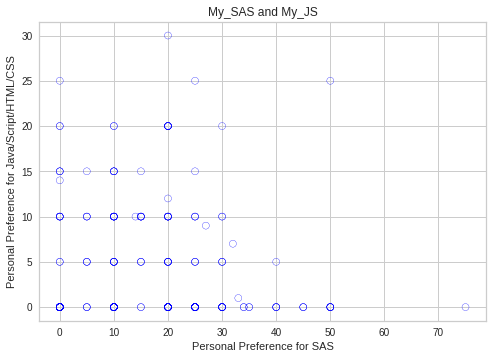

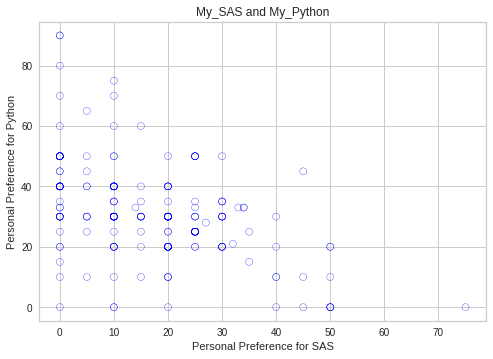

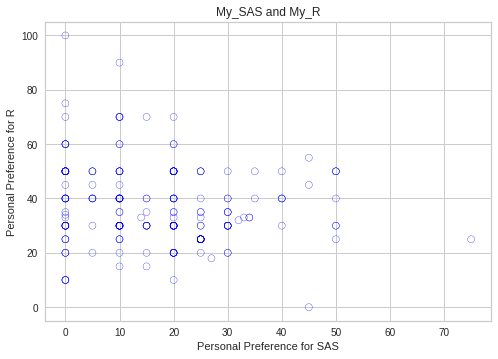

In [0]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

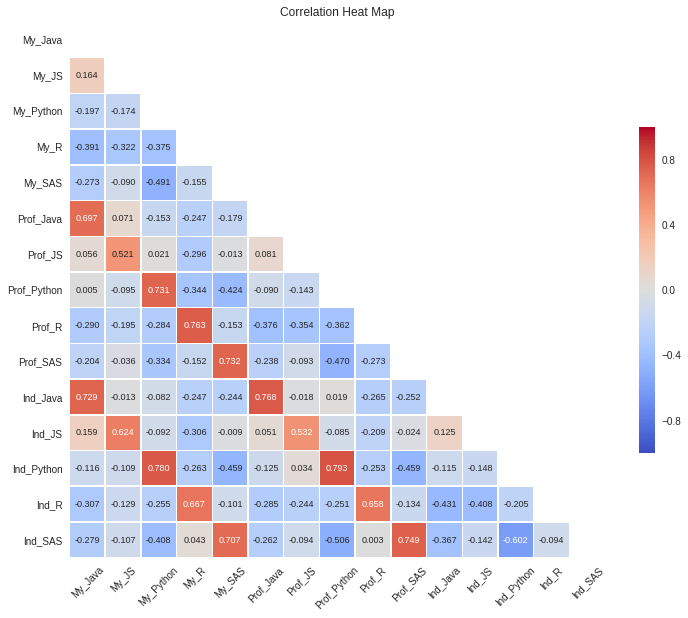

In [0]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 


In [0]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())



Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [0]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


My_Java           AxesSubplot(0.125,0.772143;0.133621x0.107857)
My_JS          AxesSubplot(0.285345,0.772143;0.133621x0.107857)
My_Python       AxesSubplot(0.44569,0.772143;0.133621x0.107857)
My_R           AxesSubplot(0.606034,0.772143;0.133621x0.107857)
My_SAS         AxesSubplot(0.766379,0.772143;0.133621x0.107857)
Prof_Java         AxesSubplot(0.125,0.642714;0.133621x0.107857)
Prof_JS        AxesSubplot(0.285345,0.642714;0.133621x0.107857)
Prof_Python     AxesSubplot(0.44569,0.642714;0.133621x0.107857)
Prof_R         AxesSubplot(0.606034,0.642714;0.133621x0.107857)
Prof_SAS       AxesSubplot(0.766379,0.642714;0.133621x0.107857)
Ind_Java          AxesSubplot(0.125,0.513286;0.133621x0.107857)
Ind_JS         AxesSubplot(0.285345,0.513286;0.133621x0.107857)
Ind_Python      AxesSubplot(0.44569,0.513286;0.133621x0.107857)
Ind_R          AxesSubplot(0.606034,0.513286;0.133621x0.107857)
Ind_SAS        AxesSubplot(0.766379,0.513286;0.133621x0.107857)
dtype: object

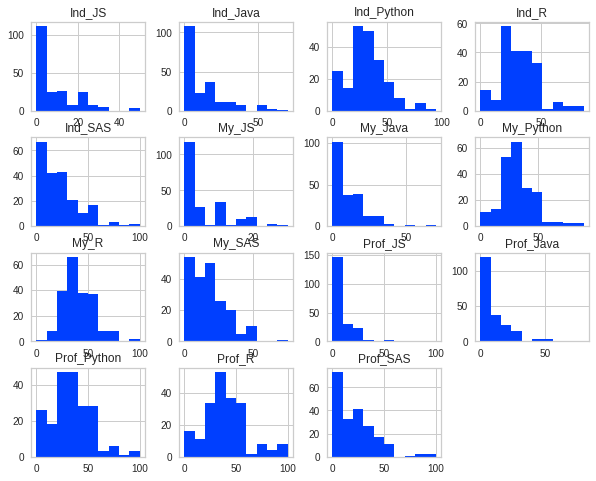

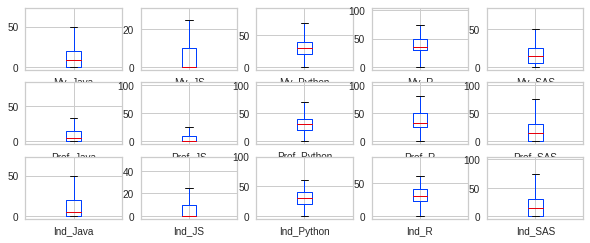

In [0]:
#///Do some EDA///;
#Some quick plots of the data
software_df.hist(figsize=(10,8))
software_df.plot(kind= 'box' , subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(10,8))

**Data Visualizations:**

Find columns with software preferences.

In [0]:
# find Java columns
print(valid_survey_input.columns.get_loc("Personal_JavaScalaSpark"),valid_survey_input.columns.get_loc("Professional_JavaScalaSpark"),valid_survey_input.columns.get_loc("Industry_JavaScalaSpark"))

0 5 10


In [0]:
# find JavaScript columns
print(valid_survey_input.columns.get_loc("Personal_JavaScriptHTMLCSS"),valid_survey_input.columns.get_loc("Professional_JavaScriptHTMLCSS"),valid_survey_input.columns.get_loc("Industry_JavaScriptHTMLCSS"))

1 6 11


In [0]:
# find Python columns
print(valid_survey_input.columns.get_loc("Personal_Python"),valid_survey_input.columns.get_loc("Professional_Python"),valid_survey_input.columns.get_loc("Industry_Python"))

2 7 12


In [0]:
# find R columns
print(valid_survey_input.columns.get_loc("Personal_R"),valid_survey_input.columns.get_loc("Professional_R"),valid_survey_input.columns.get_loc("Industry_R"))

3 8 13


In [0]:
# find SAS columns
print(valid_survey_input.columns.get_loc("Personal_SAS"),valid_survey_input.columns.get_loc("Professional_SAS"),valid_survey_input.columns.get_loc("Industry_SAS"))

4 9 14


**Create new columns, summarising student preferences by averaging across software types.**

In [0]:
# Mean for Java software preferences along 1 (horizontal) axis: return mean for each row, calculated across specified columns
valid_survey_input["Java"] = valid_survey_input.iloc[:, [0,5,10]].mean(axis=1)

In [0]:
# Mean for JavaScript software preferences along 1 (horizontal) axis: return mean for each row, calculated across specified columns
valid_survey_input["JavaScript"] = valid_survey_input.iloc[:, [1,6,11]].mean(axis=1)

In [0]:
# Mean for Python software preferences along 1 (horizontal) axis: return mean for each row, calculated across specified columns
valid_survey_input["Python"] = valid_survey_input.iloc[:, [2,7,12]].mean(axis=1)

In [0]:
# Mean for R software preferences along 1 (horizontal) axis: return mean for each row, calculated across specified columns
valid_survey_input["R"] = valid_survey_input.iloc[:, [3,8,13]].mean(axis=1)

In [0]:
# Mean for SAS software preferences along 1 (horizontal) axis: return mean for each row, calculated across specified columns
valid_survey_input["SAS"] = valid_survey_input.iloc[:, [4,9,14]].mean(axis=1)

Find columns by software type in order to count classes.

In [0]:
# find Python courses columns
print(valid_survey_input.columns.get_loc("PREDICT400"),valid_survey_input.columns.get_loc("PREDICT420"),valid_survey_input.columns.get_loc("PREDICT452"),valid_survey_input.columns.get_loc("PREDICT453"))

20 25 29 30


In [0]:
# find R courses columns
print(valid_survey_input.columns.get_loc("PREDICT401"),valid_survey_input.columns.get_loc("PREDICT413"),valid_survey_input.columns.get_loc("PREDICT450"),valid_survey_input.columns.get_loc("PREDICT451"),valid_survey_input.columns.get_loc("PREDICT454"),valid_survey_input.columns.get_loc("PREDICT455"),valid_survey_input.columns.get_loc("PREDICT456"),valid_survey_input.columns.get_loc("PREDICT457"))

21 24 27 28 31 32 33 34


In [0]:
# find SAS courses columns
print(valid_survey_input.columns.get_loc("PREDICT410"),valid_survey_input.columns.get_loc("PREDICT411"))

22 23


**Create new columns, summing student classes by counting classes by software types.**

In [0]:
# Count the number of Python courses
# Apply a count over the rows, add the result as a column
valid_survey_input["Python_courses"] = valid_survey_input.iloc[:, [20,25,29,30]].count(axis=1)

In [0]:
# Count the number of R courses
# Apply a count over the rows, add the result as a column
valid_survey_input["R_courses"] = valid_survey_input.iloc[:, [21,24,27,28,31,32,33,34]].count(axis=1)

In [0]:
# Count the number of SAS courses
# Apply a count over the rows, add the result as a column
valid_survey_input["SAS_courses"] = valid_survey_input.iloc[:, [22,23]].count(axis=1)

In [0]:
print(valid_survey_input.head())

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

Let's take a closer look at student software preferences...

In [0]:
# define working_survey_input subset DataFrame for analysis of software preferences 
working_survey_input = valid_survey_input.loc[:, ["Java","JavaScript","Python","R","SAS","Graduate_Date"]]

In [0]:
print(working_survey_input.head())

                   Java  JavaScript     Python          R        SAS  \
RespondentID                                                           
5135740122     0.000000         0.0   0.000000  41.666667  58.333333   
5133300037    18.333333        20.0  40.000000  21.666667   0.000000   
5132253300    16.666667         0.0  36.666667  40.000000   6.666667   
5132096630    10.000000        10.0  25.000000  35.000000  20.000000   
5131990362    26.666667         0.0   0.000000  70.000000   3.333333   

             Graduate_Date  
RespondentID                
5135740122             NaN  
5133300037     Spring 2018  
5132253300       Fall 2018  
5132096630       Fall 2017  
5131990362       Fall 2018  


In [0]:
# fill missing Graduate_Date values with 0
working_survey_input=working_survey_input.fillna(0)

In [0]:
# Pandas Profile Report for additional EDA of subset
# pandas_profiling.ProfileReport(working_survey_input)

In [0]:
#List unique values in the df['name'] column
working_survey_input.Graduate_Date.unique()

array([0, 'Spring 2018', 'Fall 2018', 'Fall 2017', 'Summer 2019',
       'Summer 2018', 'Winter 2019', '2020 or Later', 'Winter 2018',
       'Fall 2019', 'Fall 2016', 'Summer 2017', 'Spring 2019',
       'Spring 2017', 'Winter 2017'], dtype=object)

In [0]:
# Create dataframe to crosswalk Graduate_Date to Terms_to_Graduate
d = {'Graduate_Date': [0,"Fall 2016","Winter 2017","Spring 2017","Summer 2017","Fall 2017","Winter 2018","Spring 2018","Summer 2018","Fall 2018","Winter 2019","Spring 2019","Summer 2019","Fall 2019","2020 or Later"], 'Terms_to_Graduate': [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
df = pd.DataFrame(data=d)
df

,Graduate_Date,Terms_to_Graduate
0,0,0
1,Fall 2016,0
2,Winter 2017,1
3,Spring 2017,2
4,Summer 2017,3
5,Fall 2017,4
6,Winter 2018,5
7,Spring 2018,6
8,Summer 2018,7
9,Fall 2018,8


In [0]:
# Crosswalk data using pandas.merge to pull-in Terms_to_Graduate
working_survey_data = df.merge(working_survey_input,on='Graduate_Date', how = 'inner')
#print (working_survey_data)
# check record count
# print(len(working_survey_data))

In [0]:
# drop Graduate_Date before making the dataset tidy
working_survey_data = working_survey_data.drop(columns=['Graduate_Date'])

In [0]:
# use the pandas.melt() function to simplistically emulate the tidyr::gather() function.
# shape from wide to long with melt function in pandas
df2=pd.melt(working_survey_data,id_vars=['Terms_to_Graduate'],var_name='course', value_name='course_score')

In [0]:
# Look at aggregated data for Terms_to_Graduate by software type
working_survey_wide = working_survey_data.groupby("Terms_to_Graduate").agg(np.mean)
print(working_survey_wide)

                        Java  JavaScript     Python          R        SAS
Terms_to_Graduate                                                        
0                  13.958333    2.812500  28.020833  29.687500  25.520833
1                  10.720000    5.893333  28.373333  38.746667  16.266667
2                   8.771930    5.526316  31.982456  36.824561  16.894737
3                   7.380952    4.404762  31.142857  37.690476  19.380952
4                  12.690476    4.809524  41.690476  29.452381  11.357143
5                   8.453333   10.000000  28.933333  34.266667  18.346667
6                   8.388889    5.133333  28.611111  36.055556  21.811111
7                   8.030303    3.939394  28.333333  34.242424  25.454545
8                  11.383333    6.166667  29.716667  37.733333  15.000000
9                  13.333333    4.242424  30.757576  35.454545  16.212121
10                 15.333333    6.666667  27.000000  38.222222  12.777778
11                 16.111111    4.4444

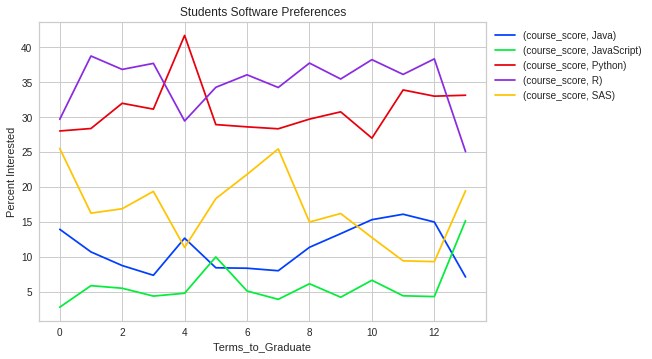

In [0]:
# Create data visualization of average software preferences by Terms_to_Graduate
plt.style.use('seaborn-bright') # set colors to something more pleasing to the eye

df2.groupby(["Terms_to_Graduate","course"]).mean().unstack().plot.line()
plt.ylabel("Percent Interested")
plt.title("Students Software Preferences")
# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

R and Python are the most popular software programming languages and should be included in future classes to meet student needs.

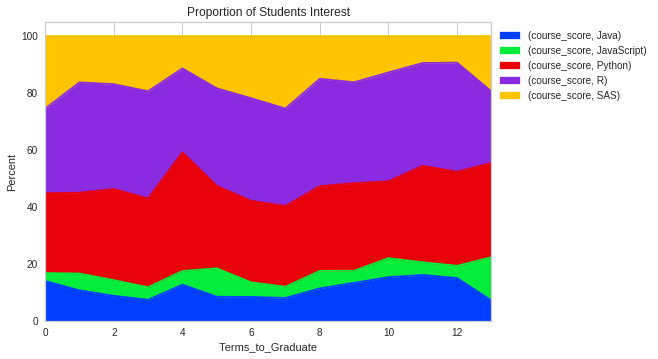

In [0]:
# Create data visualization of 100% stacked area chart of software preferences by Terms_to_Graduate
df2.groupby(["Terms_to_Graduate","course"]).mean().unstack().plot.area()
 
plt.ylabel("Percent")
# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.margins(0,0)
plt.title('Proportion of Students Interest')
plt.show()


Students appear more interested in Python and R, and show less interest in SAS, Java, and JavaScript.

Let's take a look at the number of courses by software type...

In [0]:
# define courses_survey_input subset DataFrame for analysis of software preferences 
courses_survey_input = valid_survey_input.loc[:, ["Python_courses","R_courses","SAS_courses","Graduate_Date"]]

In [0]:
print(courses_survey_input.head())

              Python_courses  R_courses  SAS_courses Graduate_Date
RespondentID                                                      
5135740122                 0          0            0           NaN
5133300037                 2          1            2   Spring 2018
5132253300                 2          1            0     Fall 2018
5132096630                 2          1            2     Fall 2017
5131990362                 0          1            2     Fall 2018


In [0]:
# Crosswalk data using pandas.merge to pull-in Terms_to_Graduate
courses_survey_data = df.merge(courses_survey_input,on='Graduate_Date', how = 'inner')

In [0]:
# drop Graduate_Date before making the dataset tidy
courses_survey_data = courses_survey_data.drop(columns=['Graduate_Date'])

In [0]:
# use the pandas.melt() function to simplistically emulate the tidyr::gather() function.
# shape from wide to long with melt function in pandas
df3=pd.melt(courses_survey_data,id_vars=['Terms_to_Graduate'],var_name='course', value_name='num_course')

In [0]:
# Look at aggregated data for Terms_to_Graduate by courses
courses_survey_wide = courses_survey_data.groupby("Terms_to_Graduate").agg(np.sum)
print(courses_survey_wide)

                   Python_courses  R_courses  SAS_courses
Terms_to_Graduate                                        
0                              16         34           21
1                              43         56           49
2                              32         45           37
3                              28         25           25
4                              26         19           16
5                              39         26           27
6                              45         33           38
7                              17         12           10
8                              26         17           18
9                              17         10            8
10                             11          6            1
11                              4          5            2
12                              5          5            4
13                              5          6            2


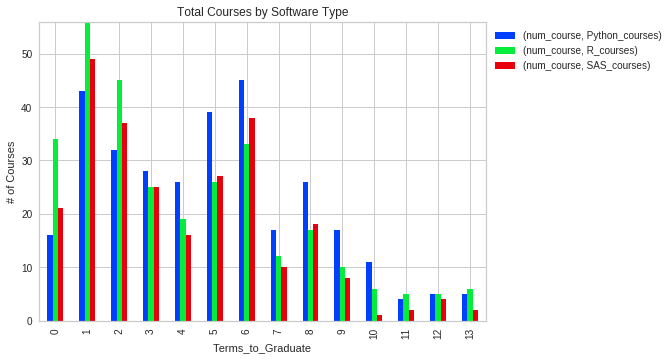

In [0]:
# Create data visualization for bar plot of courses by Terms_to_Graduate
df3.groupby(["Terms_to_Graduate","course"]).sum().unstack().plot.bar()

plt.ylabel("# of Courses")
# Put a legend to the right of the current axis
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.margins(0,0)
plt.title('Total Courses by Software Type')
plt.show()

Students with longer to graduate have fewer classes in SAS, and more classes in Python and R.

#### Section 3: Data Transformations

It's important to examine the affects of data transformations on both the response and predictor variables.  In this intance, we will look at the impact of the StandardScalar, MinMaxScaler, and NaturalLog transformations from sklearn.

transformation code added with version v005

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

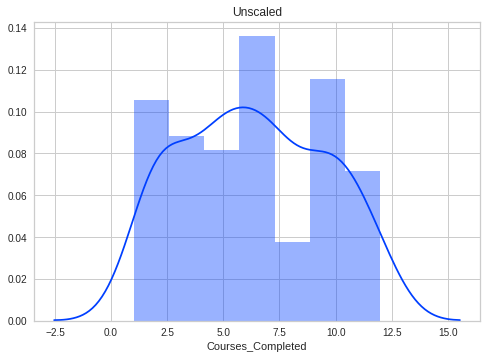

In [0]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

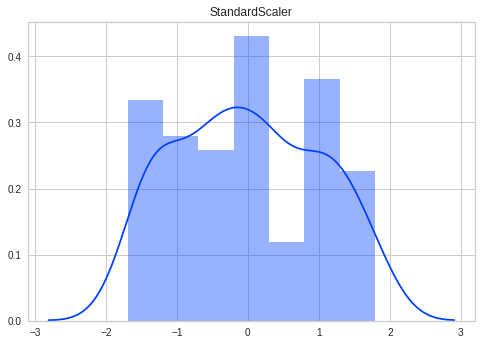

In [0]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1,1))).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

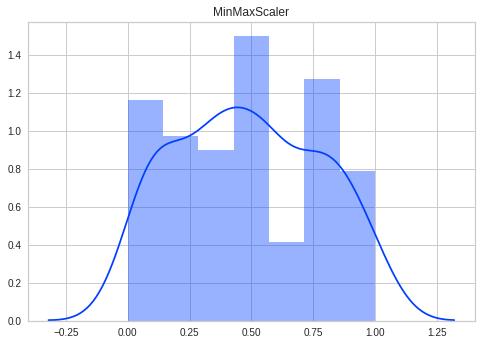

In [0]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1,1))).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)

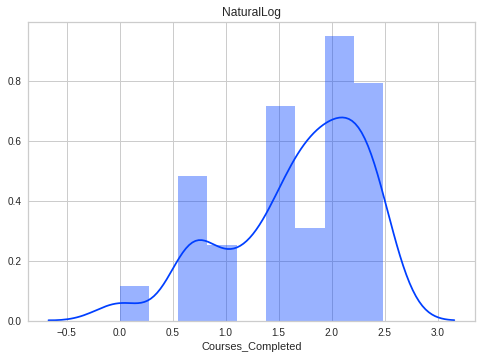

In [0]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

#### Section 4: Exploring Features

Let's take a look at summary statistics using YellowBrick.

In [0]:
# Specify the features of interest
features = [
        'Java', 'JavaScript', 'Python', 'R', 'SAS',
    ]

# Extract the instances and target
X = working_survey_data[features]
y = working_survey_data.Terms_to_Graduate

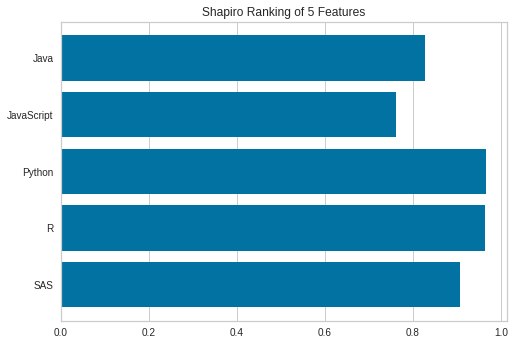

In [0]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

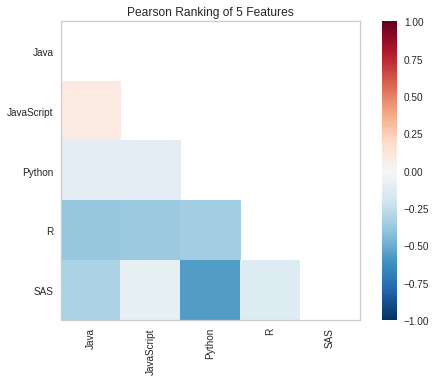

In [0]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

#### Conclusion

From the exploratory data anlaysis, we learned it may be difficult to assess student software preferences from survey data alone.  There may be confounding factors that exist, or other potential variables missing that may change the results.  After further data analysis, we discovered variables that may be helpful in reviewing student software preferences.  Using the variable "Terms to Graduate", we were able to show that students that have more time remaining in the program have a preference for R and Python.  This may be used as a tool by administrators to manage course offerings and provide long-term sustainability to the MSDS program.

**To Summarize:**

For MSDS curriculum planning purposes, we analyzed feedback from 2016 student survey data.

*   R and Python are the most popular software programming languages and should be included in future classes to meet student needs.
*   Students appear more interested in Python and R, and show less interest in SAS, Java, and JavaScript.
*   Students with longer to graduate have fewer classes in SAS, and more classes in Python and R.






